In [1]:
import pandas as pd
import seaborn as sns
data = pd.read_csv('input/employee.csv')
# data.shape
# data.describe()
# data.describe(include='object')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [20]:
data.head(3).style.format({'DailyRate': '${:5}',
                            'MonthlyIncome': '${:5}'} )

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,$110.2,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,$ 5993,1947.900000,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,$ 27.9,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,$ 5130,2490.700000,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,$137.3,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,$ 2090,239.600000,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0


In [22]:
data.head(15).style.highlight_max(color = 'lightgreen')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,110.200000,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,1947.900000,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,27.900000,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,2490.700000,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,137.300000,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,239.600000,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,139.200000,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,2315.900000,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,59.100000,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,1663.200000,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,100.500000,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,1186.400000,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,132.400000,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,996.400000,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,135.800000,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,1333.500000,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,21.600000,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,878.700000,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,129.900000,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,1657.700000,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7


In [3]:
data.iloc[3]

Age                                             33
Attrition                                       No
BusinessTravel                   Travel_Frequently
DailyRate                                     1392
Department                  Research & Development
DistanceFromHome                                 3
Education                                        4
EducationField                       Life Sciences
EmployeeCount                                    1
EmployeeNumber                                   5
EnvironmentSatisfaction                          4
Gender                                      Female
HourlyRate                                      56
JobInvolvement                                   3
JobLevel                                         1
JobRole                         Research Scientist
JobSatisfaction                                  3
MaritalStatus                              Married
MonthlyIncome                                 2909
MonthlyRate                    

In [4]:
data.iloc[5:7]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0


In [5]:
data.iloc[5:7,0:2]

,Age,Attrition
5,32,No
6,59,No


In [6]:
data.iloc[:1000:-1]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,29,No,Travel_Rarely,332,Human Resources,17,3,Other,1,1419,...,1,80,0,10,3,2,10,9,0,9
1004,26,No,Travel_Rarely,652,Research & Development,7,3,Other,1,1417,...,4,80,0,8,2,3,7,7,0,7
1003,25,No,Travel_Rarely,949,Research & Development,1,3,Technical Degree,1,1415,...,2,80,1,7,2,2,3,2,0,2
1002,35,No,Travel_Frequently,200,Research & Development,18,2,Life Sciences,1,1412,...,3,80,0,10,2,3,2,2,2,2


In [7]:
data2 = data[['Attrition','Department','MonthlyIncome','Age']].groupby([data['Attrition'],data['Department']]).agg('mean')
data2

MonthlyIncome        Age
Attrition Department                                      
No        Human Resources           7345.980392  39.627451
          Research & Development    6630.326087  37.615942
          Sales                     7232.240113  37.135593
Yes       Human Resources           3715.750000  30.083333
          Research & Development    4108.075188  33.473684
          Sales                     5908.456522  34.260870

In [8]:
data2.loc['Yes']

,MonthlyIncome,Age
Department,,
Human Resources,3715.750000,30.083333
Research & Development,4108.075188,33.473684
Sales,5908.456522,34.260870


In [9]:
for index, row in data2.iterrows():
    print("Index: {} Rows: {}".format(index, row.values))

Index: ('No', 'Human Resources') Rows: [7345.98039216   39.62745098]
Index: ('No', 'Research & Development') Rows: [6630.32608696   37.61594203]
Index: ('No', 'Sales') Rows: [7232.24011299   37.13559322]
Index: ('Yes', 'Human Resources') Rows: [3715.75         30.08333333]
Index: ('Yes', 'Research & Development') Rows: [4108.07518797   33.47368421]
Index: ('Yes', 'Sales') Rows: [5908.45652174   34.26086957]


In [10]:
for row in data2.itertuples():
    print(row)

Pandas(Index=('No', 'Human Resources'), MonthlyIncome=7345.980392156863, Age=39.627450980392155)
Pandas(Index=('No', 'Research & Development'), MonthlyIncome=6630.326086956522, Age=37.61594202898551)
Pandas(Index=('No', 'Sales'), MonthlyIncome=7232.24011299435, Age=37.13559322033898)
Pandas(Index=('Yes', 'Human Resources'), MonthlyIncome=3715.75, Age=30.083333333333332)
Pandas(Index=('Yes', 'Research & Development'), MonthlyIncome=4108.075187969925, Age=33.473684210526315)
Pandas(Index=('Yes', 'Sales'), MonthlyIncome=5908.45652173913, Age=34.26086956521739)


In [11]:
# lets define a function to divide the Daily Rate by 100
def function(x):
    return x/10

data['DailyRate'] = data['DailyRate'].map(function)
data['DailyRate']

0       110.2
1        27.9
2       137.3
3       139.2
4        59.1
        ...  
1465     88.4
1466     61.3
1467     15.5
1468    102.3
1469     62.8
Name: DailyRate, Length: 1470, dtype: float64

In [12]:
data[['DailyRate','MonthlyRate']].apply(function).head()

,DailyRate,MonthlyRate
0,11.02,1947.9
1,2.79,2490.7
2,13.73,239.6
3,13.92,2315.9
4,5.91,1663.2


In [13]:
data['MonthlyRate'] = data['MonthlyRate'].apply(lambda x: x/10)
print(data['MonthlyRate'])

0       1947.9
1       2490.7
2        239.6
3       2315.9
4       1663.2
         ...  
1465    1229.0
1466    2145.7
1467     517.4
1468    1324.3
1469    1022.8
Name: MonthlyRate, Length: 1470, dtype: float64


### Univariate Analysis on Numerical Variables

C:\Users\cti110016\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

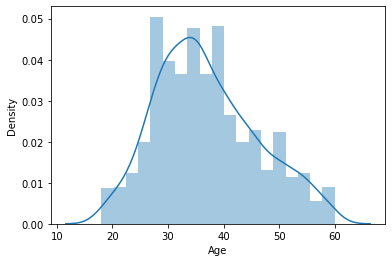

In [14]:
#Distributiong of Age variable
sns.distplot(data['Age'])

### Univariate Analysis on Categorical Variables

C:\Users\cti110016\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

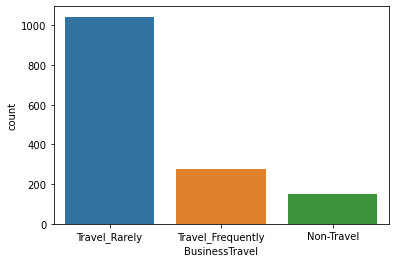

In [15]:
sns.countplot(data['BusinessTravel'])

### Correlation Heatmap

<AxesSubplot:>

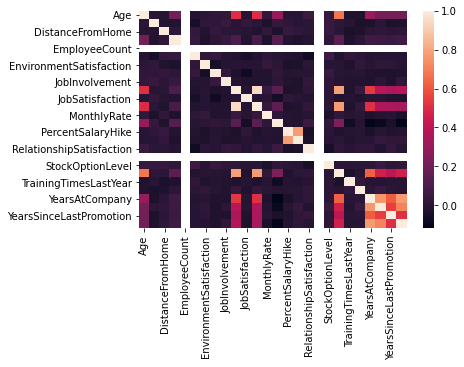

In [16]:
sns.heatmap(data.corr())

### Bar plot with Extra Variable

C:\Users\cti110016\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Department', ylabel='MonthlyIncome'>

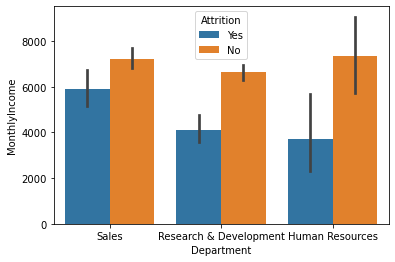

In [17]:
sns.barplot(data['Department'], data['MonthlyIncome'], data['Attrition'])